# Toy Ensemble Model

In [29]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm_notebook

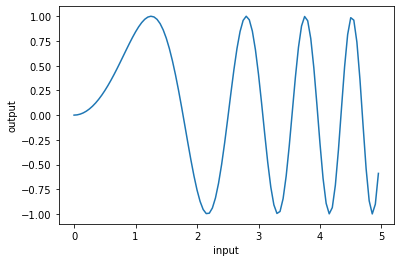

In [43]:
inputs = np.arange(0,5,0.05)
outputs = np.sin(inputs ** 2)
plt.plot(inputs,outputs)
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [31]:
# Create Net class
class Net(nn.Module):
  def __init__(self, layerWidth=200):
    super(Net, self).__init__();
    self.fc1 = nn.Linear(1, layerWidth)
    nn.init.kaiming_normal_(self.fc1.weight)
    self.fc2 = nn.Linear(layerWidth, layerWidth)
    nn.init.kaiming_normal_(self.fc2.weight)
    self.fc3 = nn.Linear(layerWidth, layerWidth)
    nn.init.kaiming_normal_(self.fc3.weight)
    self.fc4 = nn.Linear(layerWidth,1)
    nn.init.kaiming_normal_(self.fc4.weight)
  def forward (self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [32]:
nets = []
for i in range(5):
  nets.append( Net() )

In [33]:
In = torch.from_numpy(inputs).float().reshape(-1,1)
tensorOutput = torch.from_numpy(outputs).float().reshape(-1,1)
target = outputs
outs = []

In [34]:
for net in nets:
  criterion = nn.MSELoss()
  optimizer = optim.Adam(net.parameters())
  epochs = tqdm_notebook(range(1000))
  for epoch in epochs:
    optimizer.zero_grad()  
    Out = net(In)
    loss = criterion(Out, tensorOutput)
    loss.backward()
    optimizer.step() 
    epochs.set_description(str(loss.data.item()))
  outs.append(Out)

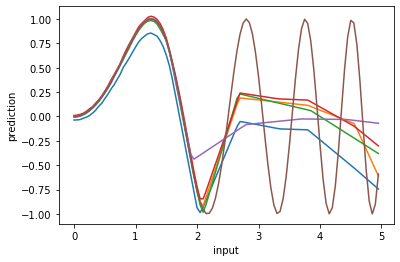

In [38]:
for i in range(len(outs)): 
  plt.plot(inputs, outs[i].detach().numpy())
  plt.xlabel('input')
  plt.ylabel('prediction')
plt.plot(inputs,outputs)
plt.show()

In [39]:
predictions = []
sds = []
for i in range(len(outs[0])):
  prediction = []
  for n in range(5):
    prediction.append(outs[n][i].item())
  prediction = np.array(prediction)
  predictions.append(np.mean(prediction))
  sds.append(np.std(prediction))

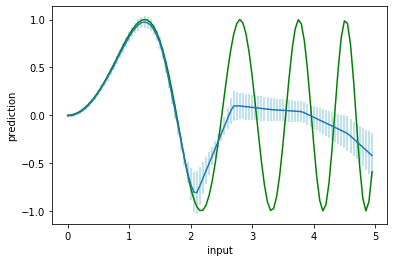

In [55]:
finalOut = np.array(predictions) 
# plt.plot(inputs,finalOut)
plt.errorbar(inputs, finalOut, yerr = sds, ecolor = 'lightblue')
plt.xlabel('input')
plt.ylabel('prediction')
plt.plot(inputs,outputs,'g')
plt.savefig('err.png', dpi=500)
plt.show()